In [9]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
import torch
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected.")



CUDA available: True
Device: NVIDIA GeForce RTX 3060 Laptop GPU


In [69]:
import os
import shutil
import random

# Define paths
original_dir = 'raw-img'
base_dir = 'processed-img'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Split data
split_ratios = {'train': 0.7, 'val': 0.1, 'test': 0.2}
classes = os.listdir(original_dir)

for class_name in classes:
    class_dir = os.path.join(original_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)

    train_cutoff = int(split_ratios['train'] * len(images))
    val_cutoff = train_cutoff + int(split_ratios['val'] * len(images))

    splits = {
        'train': images[:train_cutoff],
        'val': images[train_cutoff:val_cutoff],
        'test': images[val_cutoff:]
    }

    for split, image_list in splits.items():
        split_class_dir = os.path.join(base_dir, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for image in image_list:
            src = os.path.join(class_dir, image)
            dst = os.path.join(split_class_dir, image)
            shutil.copy(src, dst)

print("Data successfully split into train, val, and test sets!")


Data successfully split into train, val, and test sets!


In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

# Define directories for train, val, and test
train_dir = 'processed-img/train'
val_dir = 'processed-img/val'
test_dir = 'processed-img/test'

# Define image transformations without augmentation
basic_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a fixed size
    transforms.ToTensor(),         # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (example: ImageNet normalization)
])

# Load the datasets
train_dataset2 = ImageFolder(root=train_dir, transform=basic_transforms)
val_dataset2 = ImageFolder(root=val_dir, transform=basic_transforms)
test_dataset2 = ImageFolder(root=test_dir, transform=basic_transforms)

# Create DataLoader for batching
train_loader2 = DataLoader(train_dataset2, batch_size=32, shuffle=True)
val_loader2 = DataLoader(val_dataset2, batch_size=32, shuffle=False)
test_loader2 = DataLoader(test_dataset2, batch_size=32, shuffle=False)

# Get class labels
class_labels = train_dataset2.classes  # List of class names (subfolder names)

# Print class labels
print("Class Labels:", class_labels)

# To check if everything works fine, you can print the size of batches and corresponding labels
for images, labels in train_loader2:
    print("Images size:", images.size())  # Images: (batch_size, channels, height, width)
    print("Labels (batch):", labels)  # Labels: (batch_size)
    # Convert numeric labels to class names
    label_names = [class_labels[label] for label in labels]
    print("Label Names (batch):", label_names)  # Corresponding class names
    break  # Print only the first batch


Class Labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Images size: torch.Size([32, 3, 224, 224])
Labels (batch): tensor([8, 0, 2, 1, 8, 0, 9, 2, 8, 8, 1, 4, 9, 3, 1, 6, 8, 4, 2, 1, 0, 6, 0, 8,
        4, 6, 4, 1, 8, 8, 3, 5])
Label Names (batch): ['ragno', 'cane', 'elefante', 'cavallo', 'ragno', 'cane', 'scoiattolo', 'elefante', 'ragno', 'ragno', 'cavallo', 'gallina', 'scoiattolo', 'farfalla', 'cavallo', 'mucca', 'ragno', 'gallina', 'elefante', 'cavallo', 'cane', 'mucca', 'cane', 'ragno', 'gallina', 'mucca', 'gallina', 'cavallo', 'ragno', 'ragno', 'farfalla', 'gatto']


In [4]:


# Define directories for train, val, and test
train_dir = 'processed-img/train'
val_dir = 'processed-img/val'
test_dir = 'processed-img/test'

# Define image transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, translate=None, scale=(0.8, 1.2), shear=None),  # Zoom via scaling
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example for ImageNet normalization
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example for ImageNet normalization
])

# Load the datasets
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = ImageFolder(root=val_dir, transform=val_test_transforms)
test_dataset = ImageFolder(root=test_dir, transform=val_test_transforms)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Get class labels
class_labels = train_dataset.classes  # List of class names (subfolder names)

# Print class labels
print("Class Labels:", class_labels)

# To check if everything works fine, you can print the size of batches and corresponding labels
for images, labels in train_loader:
    print("Images size:", images.size())  # Images: (batch_size, channels, height, width)
    print("Labels (batch):", labels)  # Labels: (batch_size)
    # Convert numeric labels to class names
    label_names = [class_labels[label] for label in labels]
    print("Label Names (batch):", label_names)  # Corresponding class names
    break  # Print only the first batch


Class Labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Images size: torch.Size([32, 3, 224, 224])
Labels (batch): tensor([8, 4, 9, 3, 9, 6, 4, 5, 0, 5, 0, 3, 3, 0, 9, 9, 0, 8, 3, 2, 6, 4, 8, 9,
        5, 0, 4, 6, 0, 4, 0, 8])
Label Names (batch): ['ragno', 'gallina', 'scoiattolo', 'farfalla', 'scoiattolo', 'mucca', 'gallina', 'gatto', 'cane', 'gatto', 'cane', 'farfalla', 'farfalla', 'cane', 'scoiattolo', 'scoiattolo', 'cane', 'ragno', 'farfalla', 'elefante', 'mucca', 'gallina', 'ragno', 'scoiattolo', 'gatto', 'cane', 'gallina', 'mucca', 'cane', 'gallina', 'cane', 'ragno']


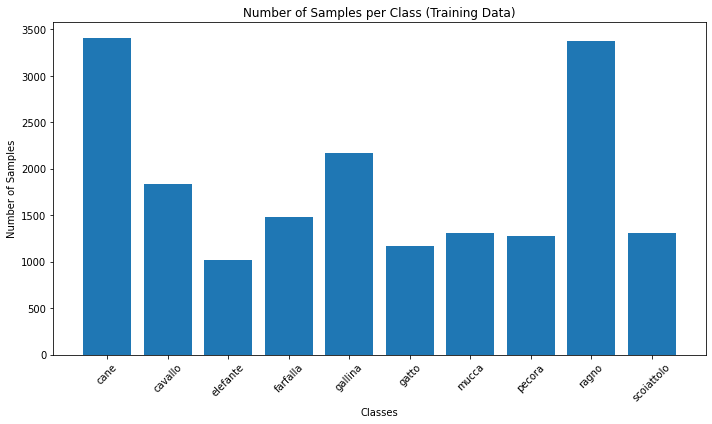

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Compute the number of samples per class in the training set
class_counts = Counter()

for _, labels in train_loader:
    class_counts.update(labels.numpy())  # Update counts for each class label

# Prepare the counts for plotting
train_class_counts = [class_counts[i] for i in range(len(class_labels))]

# Plot the number of samples per class
x = np.arange(len(class_labels))

plt.figure(figsize=(10, 6))
plt.bar(x, train_class_counts)

# Add class labels to the x-axis
plt.xticks(x, class_labels, rotation=45)
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Class (Training Data)")
plt.tight_layout()
plt.show()


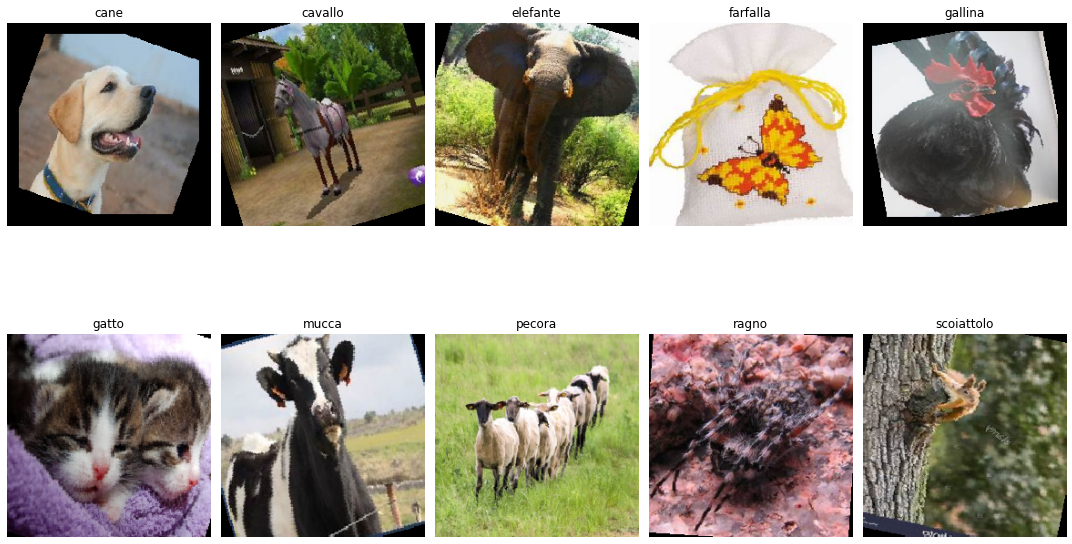

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Get the class names from the dataset
classes = train_dataset.classes

# Create a dictionary to track whether we have already displayed one image per class
displayed_classes = {class_name: False for class_name in classes}

# Initialize a plot for the images
plt.figure(figsize=(15, 10))

# Reverse normalization (if you used ImageNet stats or similar normalization)
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

# Function to unnormalize the image
def unnormalize(img, mean, std):
    # Denormalize the image
    for t, m, s in zip(img, mean, std):
        t.mul_(s).add_(m)
    return img

# Iterate through the batches in the train loader until all classes are covered
for images, labels in train_loader:
    # Iterate through images and labels in the current batch
    for img, label in zip(images, labels):
        class_idx = label.item()  # Get the class index of the current image
        class_name = classes[class_idx]
        
        # If we haven't displayed an image for this class yet
        if not displayed_classes[class_name]:
            # Unnormalize the image and convert from CxHxW to HxWxC for matplotlib
            img = unnormalize(img, mean, std).permute(1, 2, 0).cpu().numpy()  # Convert to HxWxC format

            # Plot the image
            plt.subplot(2, 5, list(displayed_classes.keys()).index(class_name) + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
            displayed_classes[class_name] = True  # Mark the class as displayed

        # Break out of the loop if all classes have been displayed
        if all(displayed_classes.values()):
            break
    if all(displayed_classes.values()):
        break

plt.tight_layout()
plt.show()


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(128)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.bn4 = nn.BatchNorm2d(256)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(256, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool1(x)
        
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.maxpool2(x)
        
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.maxpool3(x)
        
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.maxpool4(x)
        
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = CNNModel(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model summary (similar to Keras model summary)
print(model)

# Print model summary and check parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total Parameters: {total_params}")


CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveA

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


# Define the CNN model
class CNNModel2(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(256, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        
        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)
        
        x = F.relu(self.conv3(x))
        x = self.maxpool3(x)
        
        x = F.relu(self.conv4(x))
        x = self.maxpool4(x)
        
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = CNNModel2(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model summary (similar to Keras model summary)
print(model)

# Print model summary and check parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total Parameters: {total_params}")


CNNModel2(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=1)
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)
Total Parameters: 525130


Over_Fit


In [ ]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 25
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset2, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset2, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/25], Loss: 2.1344, Accuracy: 21.85%
Validation Loss: 1.9365, Validation Accuracy: 31.83%
Epoch [2/25], Loss: 1.7537, Accuracy: 38.23%
Validation Loss: 1.6133, Validation Accuracy: 42.31%
Epoch [3/25], Loss: 1.4600, Accuracy: 48.56%
Validation Loss: 1.3477, Validation Accuracy: 51.19%
Epoch [4/25], Loss: 1.2985, Accuracy: 54.39%
Validation Loss: 1.2531, Validation Accuracy: 55.51%
Epoch [5/25], Loss: 1.1671, Accuracy: 59.40%
Validation Loss: 1.1724, Validation Accuracy: 58.65%
Epoch [6/25], Loss: 1.0645, Accuracy: 62.98%
Validation Loss: 1.0765, Validation Accuracy: 62.43%
Epoch [7/25], Loss: 0.9816, Accuracy: 65.97%
Validation Loss: 0.9988, Validation Accuracy: 65.76%
Epoch [8/25], Loss: 0.9067, Accuracy: 68.76%
Validation Loss: 0.9782, Validation Accuracy: 65.80%
Epoch [9/25], Loss: 0.8487, Accuracy: 70.67%
Validation Loss: 0.9321, Validation Accuracy: 67.56%
Epoch [10/25], Loss: 0.7876, Accuracy: 72.75%
Validation Loss: 0.8926, Validation Accuracy: 69.20%


In [18]:
# Save the entire model using pickle
model_save_path = "over_fitted_model.pkl"
with open(model_save_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model pickled and saved to {model_save_path}")

Model pickled and saved to over_fitted_model.pkl


In [11]:
# Load the pickled model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "over_fitted_model.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  # Move the model to the appropriate device
print("Model loaded successfully!")

Using device: cuda
Model loaded successfully!


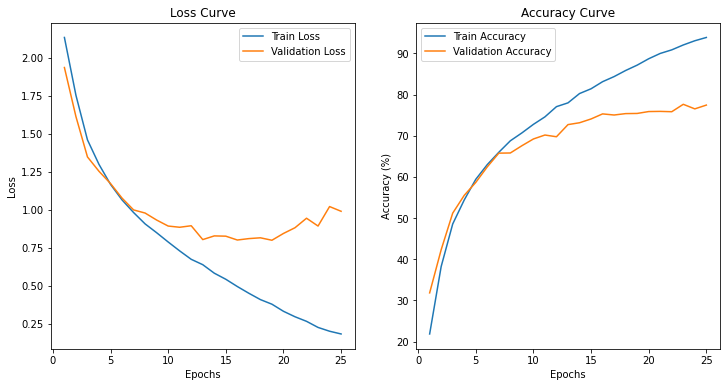

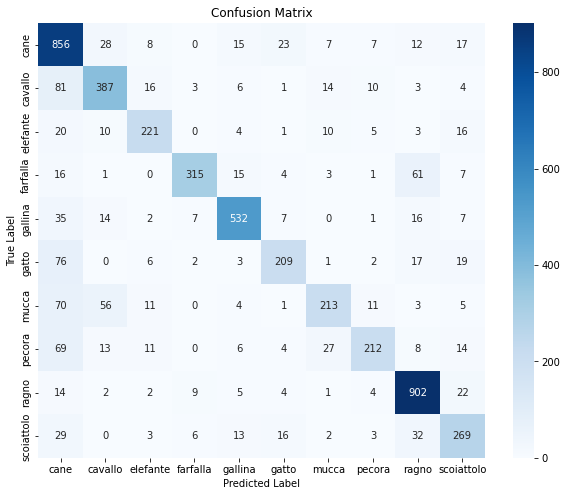

Precision: 0.7928, Recall: 0.7850, F1 Score: 0.7823
Test Accuracy: 78.50%


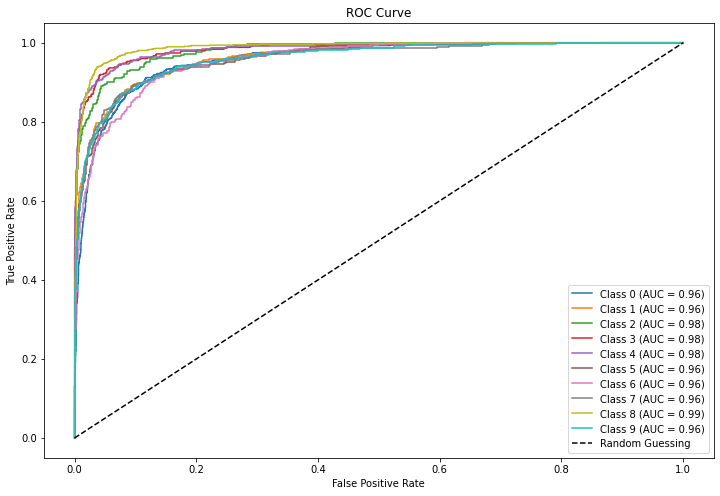

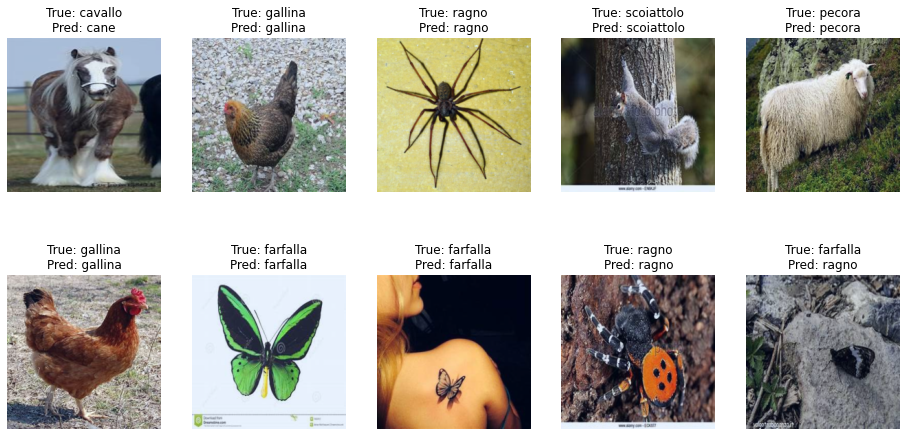

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support
)
from torch.utils.data import DataLoader
import numpy as np
model = loaded_model
# Initialize lists for storing training and validation metrics
train_losses = [
    2.1344, 1.7537, 1.4600, 1.2985, 1.1671, 
    1.0645, 0.9816, 0.9067, 0.8487, 0.7876, 
    0.7288, 0.6735, 0.6382, 0.5822, 0.5421, 
    0.4943, 0.4499, 0.4083, 0.3780, 0.3313, 
    0.2953, 0.2652, 0.2250, 0.2000, 0.1819
]

val_losses = [
    1.9365, 1.6133, 1.3477, 1.2531, 1.1724, 
    1.0765, 0.9988, 0.9782, 0.9321, 0.8926, 
    0.8846, 0.8946, 0.8034, 0.8277, 0.8259, 
    0.8006, 0.8099, 0.8152, 0.7991, 0.8438, 
    0.8815, 0.9441, 0.8926, 1.0209, 0.9898
]

train_accuracies = [
    21.85, 38.23, 48.56, 54.39, 59.40, 
    62.98, 65.97, 68.76, 70.67, 72.75, 
    74.57, 77.05, 77.97, 80.23, 81.39, 
    83.11, 84.35, 85.83, 87.13, 88.68, 
    89.97, 90.84, 92.03, 93.05, 93.85
]

val_accuracies = [
    31.83, 42.31, 51.19, 55.51, 58.65, 
    62.43, 65.76, 65.80, 67.56, 69.20, 
    70.16, 69.74, 72.69, 73.14, 74.06, 
    75.29, 75.02, 75.36, 75.40, 75.86, 
    75.90, 75.82, 77.62, 76.51, 77.43
]

class_names = class_labels

# Test DataLoader
test_loader = DataLoader(test_dataset2, batch_size=32, shuffle=False)

# After training, plot learning curves and evaluate the model
def evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies):
    # Plot learning curves
    epochs_range = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label="Train Loss")
    plt.plot(epochs_range, val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
    plt.plot(epochs_range, val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy Curve")
    plt.legend()

    plt.show()

# Function to evaluate the model on test data and generate metrics
def evaluate_on_test_data(model, test_loader):
    model.eval()
    y_true, y_pred, y_probs = [], [], []
    correct = 0  # Initialize correct predictions counter
    total = 0  # Initialize total samples counter

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            y_probs.extend(probabilities.cpu().numpy())

            # Count correct predictions and total samples
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    # Calculate test accuracy
    test_accuracy = 100 * correct / total

    # Generate Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Print classification report
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_score:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2f}%")  # Print test accuracy

    # Generate and plot ROC curve for each class
    plt.figure(figsize=(12, 8))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(
            [1 if label == i else 0 for label in y_true],
            [prob[i] for prob in y_probs]
        )
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


import random

# Visualize some random test images with predictions and true labels
def visualize_predictions(model, test_loader, num_images=10):
    model.eval()

    # Collect all images and labels from the test loader
    all_images, all_labels = [], []
    for images, labels in test_loader:
        all_images.append(images)
        all_labels.append(labels)

    # Concatenate all batches into single tensors
    all_images = torch.cat(all_images)
    all_labels = torch.cat(all_labels)

    # Generate random indices for selecting images
    random_indices = random.sample(range(len(all_images)), min(num_images, len(all_images)))

    # Select random images and labels
    selected_images = all_images[random_indices]
    selected_labels = all_labels[random_indices]

    with torch.no_grad():
        outputs = model(selected_images.to(device))
        _, predictions = torch.max(outputs, 1)

    plt.figure(figsize=(16, 8))
    for i, idx in enumerate(random_indices):
        # Convert the tensor image to numpy and rescale pixel values to [0, 1]
        img = selected_images[i].cpu().numpy()
        img = np.transpose(img, (1, 2, 0))  # Convert from [C, H, W] to [H, W, C]
        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]

        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(
            f"True: {class_names[selected_labels[i]]}\nPred: {class_names[predictions[i].cpu()]}"
        )
        plt.axis("off")
    plt.show()


# Call the functions
evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)


In [17]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 20
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/20], Loss: 1.9147, Accuracy: 32.06%
Validation Loss: 1.8869, Validation Accuracy: 34.28%
Epoch [2/20], Loss: 1.6626, Accuracy: 41.58%
Validation Loss: 1.4819, Validation Accuracy: 47.51%
Epoch [3/20], Loss: 1.4988, Accuracy: 46.98%
Validation Loss: 1.3897, Validation Accuracy: 50.99%
Epoch [4/20], Loss: 1.4003, Accuracy: 51.25%
Validation Loss: 1.3474, Validation Accuracy: 54.90%
Epoch [5/20], Loss: 1.3137, Accuracy: 54.32%
Validation Loss: 1.1819, Validation Accuracy: 58.72%
Epoch [6/20], Loss: 1.2603, Accuracy: 56.24%
Validation Loss: 1.2745, Validation Accuracy: 55.05%
Epoch [7/20], Loss: 1.1901, Accuracy: 58.87%
Validation Loss: 1.0825, Validation Accuracy: 62.01%
Epoch [8/20], Loss: 1.1545, Accuracy: 60.16%
Validation Loss: 1.0953, Validation Accuracy: 61.36%
Epoch [9/20], Loss: 1.1056, Accuracy: 61.75%
Validation Loss: 0.9714, Validation Accuracy: 66.22%
Epoch [10/20], Loss: 1.0808, Accuracy: 62.97%
Validation Loss: 1.1175, Validation Accuracy: 60.83%


In [18]:
# Additional epochs
additional_epochs = 10

# Filepath to save the new model
model_save_path = "trained_model_additional_epochs.pth"

# Continue training loop
for epoch in range(epochs, epochs + additional_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs + additional_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Epoch [21/30], Loss: 0.8132, Accuracy: 72.93%
Validation Loss: 1.0016, Validation Accuracy: 67.10%
Epoch [22/30], Loss: 0.7904, Accuracy: 73.73%
Validation Loss: 0.8147, Validation Accuracy: 71.96%
Epoch [23/30], Loss: 0.7765, Accuracy: 74.35%
Validation Loss: 0.7524, Validation Accuracy: 74.94%
Epoch [24/30], Loss: 0.7433, Accuracy: 75.21%
Validation Loss: 0.8835, Validation Accuracy: 69.78%
Epoch [25/30], Loss: 0.7433, Accuracy: 75.07%
Validation Loss: 0.6824, Validation Accuracy: 77.05%
Epoch [26/30], Loss: 0.7155, Accuracy: 76.37%
Validation Loss: 0.7125, Validation Accuracy: 75.48%
Epoch [27/30], Loss: 0.6856, Accuracy: 77.29%
Validation Loss: 0.6861, Validation Accuracy: 77.47%
Epoch [28/30], Loss: 0.6896, Accuracy: 77.05%
Validation Loss: 0.7464, Validation Accuracy: 76.47%
Epoch [29/30], Loss: 0.6698, Accuracy: 77.66%
Validation Loss: 0.7238, Validation Accuracy: 75.36%
Epoch [30/30], Loss: 0.6446, Accuracy: 78.55%
Validation Loss: 0.7153, Validation Accuracy: 77.85%
Model save

In [19]:
# Further additional epochs
additional_epochs = 10

# Filepath to save the updated model after more training
model_save_path = "trained_model_further_epochs.pth"

# Continue training loop
for epoch in range(epochs + additional_epochs, epochs + 2 * additional_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs + 2 * additional_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Epoch [31/40], Loss: 0.6299, Accuracy: 79.08%
Validation Loss: 0.5839, Validation Accuracy: 80.37%
Epoch [32/40], Loss: 0.6264, Accuracy: 79.19%
Validation Loss: 0.6238, Validation Accuracy: 79.57%
Epoch [33/40], Loss: 0.6038, Accuracy: 79.89%
Validation Loss: 0.6163, Validation Accuracy: 79.19%
Epoch [34/40], Loss: 0.5998, Accuracy: 80.06%
Validation Loss: 0.6431, Validation Accuracy: 78.84%
Epoch [35/40], Loss: 0.5870, Accuracy: 80.42%
Validation Loss: 0.6550, Validation Accuracy: 78.00%
Epoch [36/40], Loss: 0.5705, Accuracy: 81.19%
Validation Loss: 0.6589, Validation Accuracy: 77.85%
Epoch [37/40], Loss: 0.5699, Accuracy: 81.18%
Validation Loss: 0.5883, Validation Accuracy: 80.18%
Epoch [38/40], Loss: 0.5492, Accuracy: 81.97%
Validation Loss: 0.5783, Validation Accuracy: 82.10%
Epoch [39/40], Loss: 0.5411, Accuracy: 82.17%
Validation Loss: 0.5140, Validation Accuracy: 83.05%
Epoch [40/40], Loss: 0.5343, Accuracy: 82.51%
Validation Loss: 0.6051, Validation Accuracy: 81.10%
Model save

In [20]:
# Continue for 10 more epochs
additional_epochs = 10

# Filepath to save the updated model after 10 more epochs
model_save_path = "trained_model_10_more_epochs.pth"

# Continue training loop
for epoch in range(epochs + additional_epochs, epochs + 2 * additional_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs + 2 * additional_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Epoch [31/40], Loss: 0.5211, Accuracy: 83.03%
Validation Loss: 0.6138, Validation Accuracy: 80.49%
Epoch [32/40], Loss: 0.5140, Accuracy: 83.05%
Validation Loss: 0.6768, Validation Accuracy: 77.62%
Epoch [33/40], Loss: 0.5002, Accuracy: 83.54%
Validation Loss: 0.5434, Validation Accuracy: 83.78%
Epoch [34/40], Loss: 0.4857, Accuracy: 83.51%
Validation Loss: 0.5573, Validation Accuracy: 82.56%
Epoch [35/40], Loss: 0.4819, Accuracy: 83.94%
Validation Loss: 0.4993, Validation Accuracy: 83.82%
Epoch [36/40], Loss: 0.4714, Accuracy: 84.66%
Validation Loss: 0.5634, Validation Accuracy: 82.63%
Epoch [37/40], Loss: 0.4648, Accuracy: 84.61%
Validation Loss: 0.6082, Validation Accuracy: 81.25%
Epoch [38/40], Loss: 0.4581, Accuracy: 84.88%
Validation Loss: 0.6435, Validation Accuracy: 80.07%
Epoch [39/40], Loss: 0.4485, Accuracy: 85.11%
Validation Loss: 0.5640, Validation Accuracy: 82.06%
Epoch [40/40], Loss: 0.4353, Accuracy: 85.61%
Validation Loss: 0.4852, Validation Accuracy: 84.66%
Model save

In [27]:


# Load the saved model's state dictionary
model.load_state_dict(torch.load("trained_model_10_more_epochs.pth"))

# Move model to the appropriate device (CPU or GPU)
model.to(device)

# Set the model to evaluation mode if you're using it for inference
model.eval()

print("Model loaded successfully!")

Model loaded successfully!


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7352\3796426575.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("trained_model_10_more_epochs

In [28]:
# Continue for 10 more epochs
additional_epochs = 10

# Filepath to save the updated model after 10 more epochs
model_save_path = "trained_model_60_epochs.pth"
epochs = 40
# Continue training loop
for epoch in range(epochs + additional_epochs, epochs + 2 * additional_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs + 2 * additional_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Epoch [51/60], Loss: 0.4284, Accuracy: 85.63%
Validation Loss: 0.6007, Validation Accuracy: 81.52%
Epoch [52/60], Loss: 0.4305, Accuracy: 85.69%
Validation Loss: 0.4983, Validation Accuracy: 83.47%
Epoch [53/60], Loss: 0.4142, Accuracy: 86.07%
Validation Loss: 0.5605, Validation Accuracy: 82.90%
Epoch [54/60], Loss: 0.4215, Accuracy: 85.84%
Validation Loss: 0.5407, Validation Accuracy: 82.82%
Epoch [55/60], Loss: 0.4065, Accuracy: 86.74%
Validation Loss: 0.6206, Validation Accuracy: 80.99%
Epoch [56/60], Loss: 0.4126, Accuracy: 86.46%
Validation Loss: 0.4778, Validation Accuracy: 84.77%
Epoch [57/60], Loss: 0.3896, Accuracy: 87.26%
Validation Loss: 0.4869, Validation Accuracy: 85.04%
Epoch [58/60], Loss: 0.3812, Accuracy: 87.21%
Validation Loss: 0.5181, Validation Accuracy: 83.89%
Epoch [59/60], Loss: 0.3721, Accuracy: 87.45%
Validation Loss: 0.5158, Validation Accuracy: 83.86%
Epoch [60/60], Loss: 0.3703, Accuracy: 87.87%
Validation Loss: 0.4867, Validation Accuracy: 84.89%
Model save

In [ ]:


# Load the saved model's state dictionary
model.load_state_dict(torch.load("trained_model_60_epochs.pth"))

# Move model to the appropriate device (CPU or GPU)
model.to(device)

# Set the model to evaluation mode if you're using it for inference
model.eval()

print("Model loaded successfully!")

In [34]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader


# Instantiate the model
model2 = CNNModel(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model summary (similar to Keras model summary)
print(model2)

# Print model summary and check parameters
def count_parameters(model2):
    return sum(p.numel() for p in model2.parameters() if p.requires_grad)

total_params = count_parameters(model2)
print(f"Total Parameters: {total_params}")
# Hyperparameters
learning_rate = 0.005
batch_size = 32
epochs = 20
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model2 = model2.to(device)

# Training loop
for epoch in range(epochs):
    model2.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model2(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model2.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model2(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveA

In [36]:
model_save_path = "model2.pth"
torch.save(model2.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to model2.pth


In [37]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader


# Instantiate the model
model3 = CNNModel(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model3.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model summary (similar to Keras model summary)
print(model3)

# Print model summary and check parameters
def count_parameters(model3):
    return sum(p.numel() for p in model3.parameters() if p.requires_grad)

total_params = count_parameters(model3)
print(f"Total Parameters: {total_params}")
# Hyperparameters
learning_rate = 0.01
batch_size = 64
epochs = 20
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model3 = model3.to(device)

# Training loop
for epoch in range(epochs):
    model3.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model3(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model3.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model3(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")
model_save_path = "model3.pth"
torch.save(model3.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveA

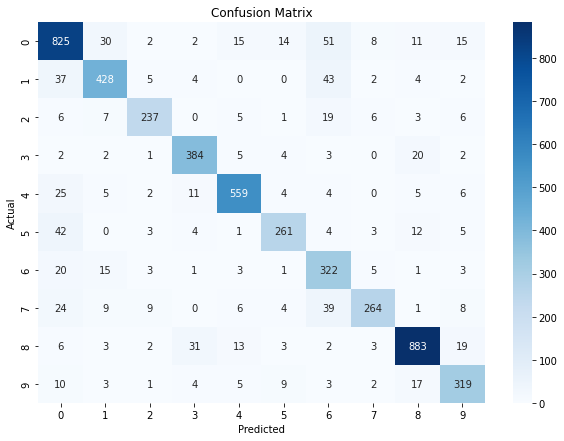

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.83      0.85      0.84       973
     Class 1       0.85      0.82      0.83       525
     Class 2       0.89      0.82      0.85       290
     Class 3       0.87      0.91      0.89       423
     Class 4       0.91      0.90      0.91       621
     Class 5       0.87      0.78      0.82       335
     Class 6       0.66      0.86      0.75       374
     Class 7       0.90      0.73      0.80       364
     Class 8       0.92      0.92      0.92       965
     Class 9       0.83      0.86      0.84       373

    accuracy                           0.85      5243
   macro avg       0.85      0.84      0.85      5243
weighted avg       0.86      0.85      0.86      5243



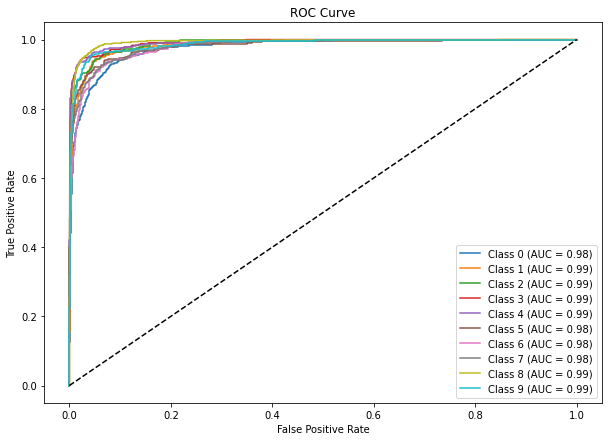

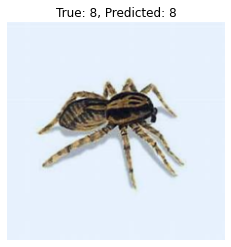

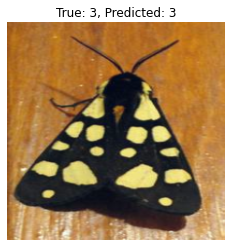

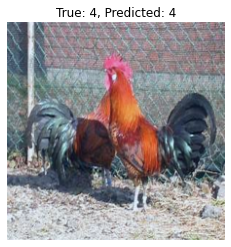

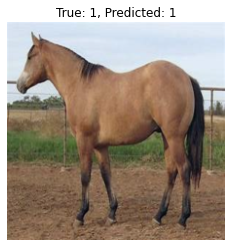

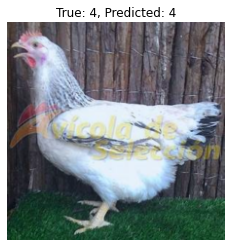

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import torch.nn.functional as F
import numpy as np
import random

# Function to calculate metrics and visualize results
def analyze_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode

    all_labels = []
    all_predictions = []
    all_probabilities = []

    # Iterate over test data
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probabilities = F.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

    # Convert lists to numpy arrays
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    all_probabilities = np.array(all_probabilities)

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    report = classification_report(all_labels, all_predictions, target_names=[f'Class {i}' for i in range(10)])
    print("Classification Report:\n", report)

    # ROC Curve and AUC
    plt.figure(figsize=(10, 7))
    for i in range(10):  # Assuming 10 classes
        fpr, tpr, _ = roc_curve(all_labels == i, all_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Visualize some test images with true and predicted labels
def visualize_predictions(model, test_loader, device, num_images=5):
    model.eval()
    all_images = []
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)

            all_images.extend(images.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Combine all and randomize
    combined = list(zip(all_images, all_labels, all_predictions))
    random.shuffle(combined)

    # Display random images
    for i, (img, true_label, pred_label) in enumerate(combined[:num_images]):
        img = np.transpose(img, (1, 2, 0))  # Convert to HWC format
        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1] for correct display

        plt.figure()
        plt.imshow(img)
        plt.title(f'True: {true_label}, Predicted: {pred_label}')
        plt.axis('off')
        plt.show()


analyze_model(model, test_loader, device)
visualize_predictions(model, test_loader, device)


phase 2

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the modified CNN model
class CNNModelModified(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModelModified, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)  # Reduced filters
        self.bn1 = nn.BatchNorm2d(16)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)  # Reduced filters
        self.bn2 = nn.BatchNorm2d(32)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)  # Reduced filters
        self.bn3 = nn.BatchNorm2d(64)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)  # Reduced filters
        self.bn4 = nn.BatchNorm2d(128)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)

        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(128, 256)  # Reduced units
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)  # Reduced units

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.maxpool2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.maxpool3(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.maxpool4(x)

        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the modified model
model_mod = CNNModelModified(num_classes=10)

# Define the optimizer and loss function
optimizer = optim.Adam(model_mod.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Print model_mod summary and check parameters
def count_parameters(model_mod):
    return sum(p.numel() for p in model_mod.parameters() if p.requires_grad)

total_params = count_parameters(model_mod)
print(model_mod)
print(f"Total Parameters: {total_params}")


CNNModelModified(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): Adap

In [41]:
# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 60
num_classes = 10  # Number of classes in your dataset

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mod.parameters(), lr=learning_rate)

# Accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

# DataLoaders for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the appropriate device
model_mod = model_mod.to(device)

# Training loop
for epoch in range(epochs):
    model_mod.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model_mod(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    # Validation phase
    model_mod.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to GPU if available
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model_mod(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/60], Loss: 1.9084, Accuracy: 33.06%
Validation Loss: 1.6774, Validation Accuracy: 38.98%
Epoch [2/60], Loss: 1.6275, Accuracy: 42.72%
Validation Loss: 1.5847, Validation Accuracy: 43.11%
Epoch [3/60], Loss: 1.4795, Accuracy: 48.30%
Validation Loss: 1.3744, Validation Accuracy: 51.87%
Epoch [4/60], Loss: 1.4034, Accuracy: 50.93%
Validation Loss: 1.3907, Validation Accuracy: 50.57%
Epoch [5/60], Loss: 1.3319, Accuracy: 53.65%
Validation Loss: 1.2980, Validation Accuracy: 52.83%
Epoch [6/60], Loss: 1.2853, Accuracy: 55.45%
Validation Loss: 1.3815, Validation Accuracy: 52.37%
Epoch [7/60], Loss: 1.2300, Accuracy: 57.17%
Validation Loss: 1.1531, Validation Accuracy: 58.84%
Epoch [8/60], Loss: 1.2033, Accuracy: 58.47%
Validation Loss: 1.1509, Validation Accuracy: 58.68%
Epoch [9/60], Loss: 1.1681, Accuracy: 59.56%
Validation Loss: 1.2036, Validation Accuracy: 58.95%
Epoch [10/60], Loss: 1.1452, Accuracy: 60.36%
Validation Loss: 1.1081, Validation Accuracy: 60.18%


In [42]:
model_save_path = "model_pahse2.pth"
torch.save(model_mod.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to model_pahse2.pth


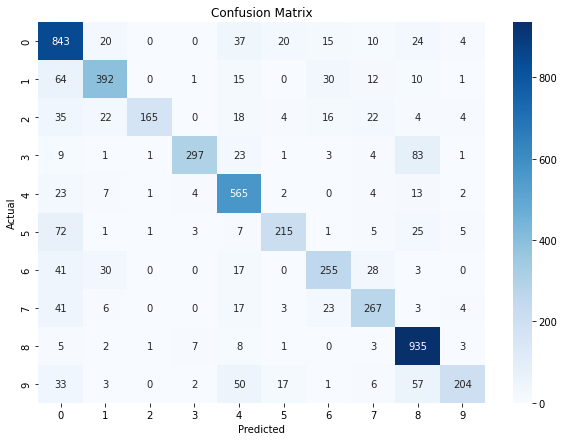

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.72      0.87      0.79       973
     Class 1       0.81      0.75      0.78       525
     Class 2       0.98      0.57      0.72       290
     Class 3       0.95      0.70      0.81       423
     Class 4       0.75      0.91      0.82       621
     Class 5       0.82      0.64      0.72       335
     Class 6       0.74      0.68      0.71       374
     Class 7       0.74      0.73      0.74       364
     Class 8       0.81      0.97      0.88       965
     Class 9       0.89      0.55      0.68       373

    accuracy                           0.79      5243
   macro avg       0.82      0.74      0.76      5243
weighted avg       0.80      0.79      0.78      5243



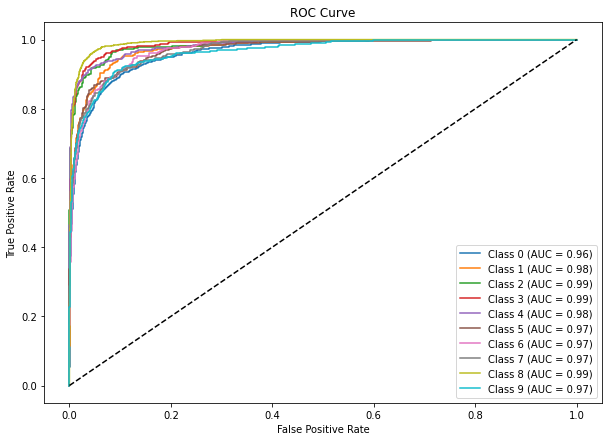

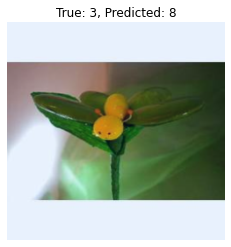

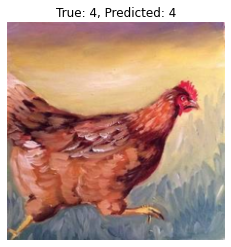

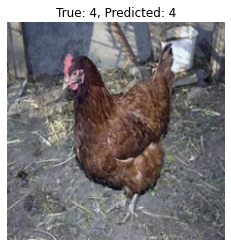

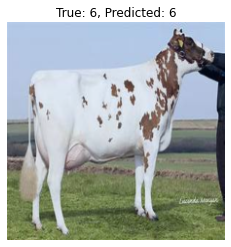

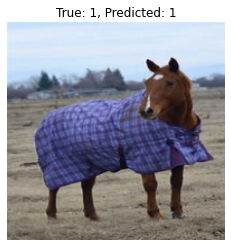

In [45]:
analyze_model(model_mod, test_loader, device)
visualize_predictions(model_mod, test_loader, device)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

# Adjusted Model Design
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # 32 filters
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),  # 64 filters
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  # 128 filters
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),  # 256 filters
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),  # Efficient spatial feature reduction
    Dense(512, activation='relu'),  # Dense layer with 512 neurons
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the Model
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Check Model Parameters
model2.summary()


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:local

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,130 (2.00 MB)

 Trainable params: 525,130 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Train the Model
history = model2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]
)


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/5
Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Ex

KeyboardInterrupt: 

In [ ]:
# Save in TensorFlow's SavedModel format
model.save('my_cnn_model1.keras')  # Creates a folder with the model files


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_cnn_model1.keras')


In [ ]:
# Evaluate on Test Data
test_loss, test_acc = model2.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Predictions
predictions = model2.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

# Precision, Recall, F1-Score
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(class_report)


In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, predictions[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Learning Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


First Model

In [82]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Updated CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Increased filters
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),  # Increased filters
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),  # Increased filters
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Fourth Convolutional Block
    Conv2D(256, (3, 3), activation='relu'),  # Additional block to increase parameters
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Global Average Pooling
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(512, activation='relu'),  # Larger dense layer
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,454,922 (5.55 MB)

 Trainable params: 1,454,922 (5.55 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Train the model on the training dataset
history = model.fit(
    train_generator,
    batch_size = 32,
    learning_rate = 0.005,
    epochs=10,  # You can adjust based on model convergence
    validation_data=validation_generator
)


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 623s 949ms/step - accuracy: 0.3621 - loss: 1.8478 - val_accuracy: 0.3014 - val_loss: 2.7730
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 614s 935ms/step - accuracy: 0.5184 - loss: 1.4010 - val_accuracy: 0.2789 - val_loss: 2.4840
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 617s 939ms/step - accuracy: 0.5968 - loss: 1.1671 - val_accuracy: 0.5401 - val_loss: 1.4916
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 621s 946ms/step - accuracy: 0.6683 - loss: 1.0004 - val_accuracy: 0.6219 - val_loss: 1.0847
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 616s 939ms/step - accuracy: 0.7069 - loss: 0.8648 - val_accuracy: 0.5745 - val_loss: 1.3762
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 618s 941ms/step - accuracy: 0.7455 - loss: 0.7712 - val_accuracy: 0.4025 - val_loss: 2.8123
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 613s 934ms/step - accuracy: 0.7664 - loss: 0.6950 - val_accuracy: 0.6678 - val_loss: 1.0010
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 608s 926ms/step - accuracy: 0.7829 -

In [53]:
# Save in TensorFlow's SavedModel format
model.save('my_cnn_model1.keras')  # Creates a folder with the model files


In [58]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_cnn_model1.keras')


In [62]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from tensorflow.keras.models import load_model



# Get predictions for the test set
test_predictions = loaded_model.predict(test_generator)
test_predictions = np.argmax(test_predictions, axis=1)  # Get predicted class indices

# Get true labels for the test set
test_true_labels = test_generator.classes



# Calculate metrics for the test set
test_f1 = f1_score(test_true_labels, test_predictions, average='weighted')
test_accuracy = accuracy_score(test_true_labels, test_predictions)
test_recall = recall_score(test_true_labels, test_predictions, average='weighted')
test_precision = precision_score(test_true_labels, test_predictions, average='weighted')

# Confusion Matrix for Test Set
test_conf_matrix = confusion_matrix(test_true_labels, test_predictions)
print(f"\nConfusion Matrix for Test Set:\n{test_conf_matrix}")



print(f"\nTest Metrics:")
print(f"F1 Score: {test_f1:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")


819/819 ━━━━━━━━━━━━━━━━━━━━ 171s 209ms/step

Confusion Matrix for Test Set:
[[3216   30  671  206   78  512   12   43   20   75]
 [ 147 1157  986  175   44   50   23   15   10   16]
 [   5    1 1408    9    4   14    0    2    1    2]
 [   5    0   21 2036   15   16    0    2   16    1]
 [  56    0  454  275 2199   49    0   22   26   17]
 [  65    1  182   64    6 1311    0    7   13   19]
 [ 115   80  687  105   32   56  664  116    5    6]
 [  45   11  639   33   16   78   41  944    5    8]
 [  74    1  298 1404   61  149    0   12 2785   37]
 [  27    3  319  182   38  128    0   24   42 1099]]

Test Metrics:
F1 Score: 0.6663
Accuracy: 0.6425
Recall: 0.6425
Precision: 0.7952


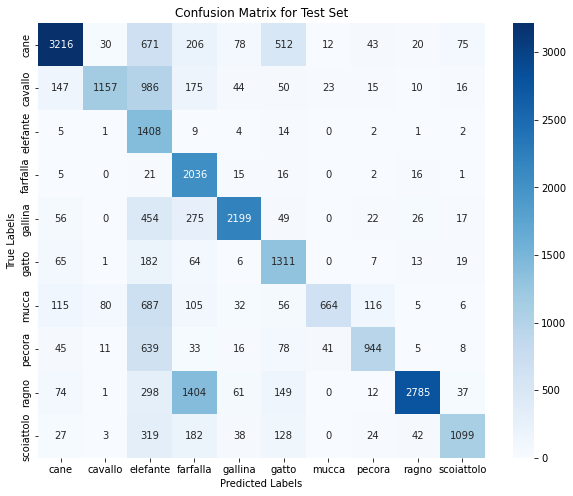

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
